# Diwali Sales Analysis

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
#to avoid encoding error, use 'unicode_escape'

In [4]:
# Knowing the shape of the data(rows and columns)
df.shape

(11251, 15)

In [83]:
# Fetching first 5 rows by default using head function
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [6]:
# Info will give the column names, thier null value count, Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Drop unrelated or blank columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
# Checking whether the columns are dropped successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
# Now we want to check null values
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.shape

(11251, 13)

In [12]:
# drop null values
df.dropna(inplace=True)

In [13]:
# Rechecking the shape after dropping the null values
df.shape

(11239, 13)

In [14]:
# Initialize list of lists
data_test = [['Madhav', 11], ['Gopi', 15], ['Keshav', ], ['Lalita', 16]]

# Create the pandas data frame using the list
df_test = pd.DataFrame(data_test, columns =['Name','Age'])

df_test

,Name,Age
0,Madhav,11.0
1,Gopi,15.0
2,Keshav,NaN
3,Lalita,16.0


In [15]:
df_test.dropna(inplace=True)

# inplace is used to save

In [16]:
df_test

,Name,Age
0,Madhav,11.0
1,Gopi,15.0
3,Lalita,16.0


#### Both are same thing

###### df_test.dropna(inplace=true)
###### df_test = df_test.dropna()

In [17]:
# changing the data type to int
df['Amount'] = df['Amount'].astype('int')

In [18]:
df['Amount'].dtype

dtype('int64')

In [19]:
# Fetching the column names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
# Renaming column
df.rename(columns={'Marital_Status':'Marriage', 'Occupation':'Job'})

# Here we used dictionary.
# It has curly bracket and "key and value" pairs
# Here we could use '(inplace=True)' to save changes to the main dataframe.

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marriage,State,Zone,Job,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [21]:
# describe() returns description of data in dataframe.(i.e.) Count, Mean, Std, etc.
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [22]:
# Fetching description for particular columns(Age, Orders, Amount)
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

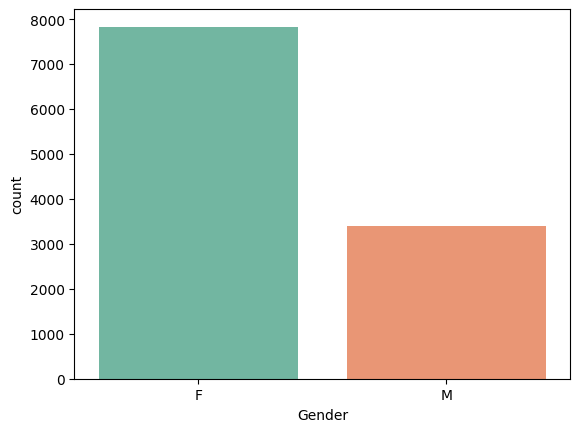

In [24]:
# Countplot for gender
ax = sns.countplot(x='Gender',data = df,palette='Set2')

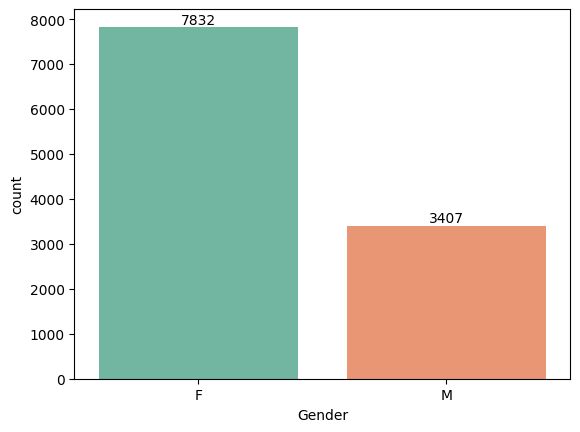

In [25]:
# Countplot for gender with label
ax = sns.countplot(x='Gender',data = df,palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

In [26]:
# Groupby gender and amount
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

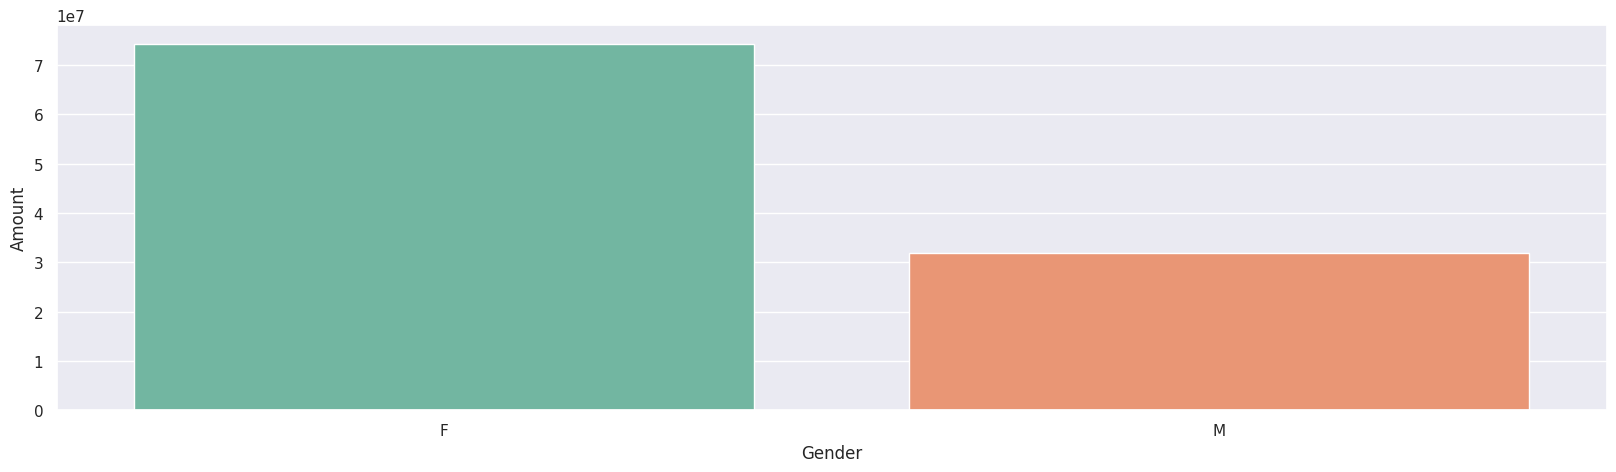

In [81]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x ='Gender', y ='Amount', data = sales_gen,palette='Set2')

**From above graphs we can see that most of the buyers are females and even purchasing power of females are greater than men.**

# Age

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

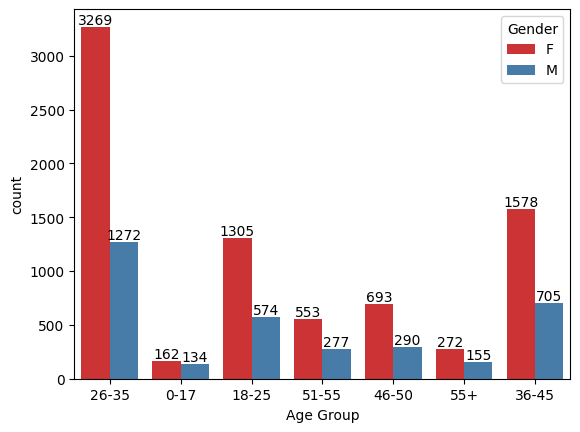

In [29]:
# Countplot for Age Group and Gender with labels
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette='Set1')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

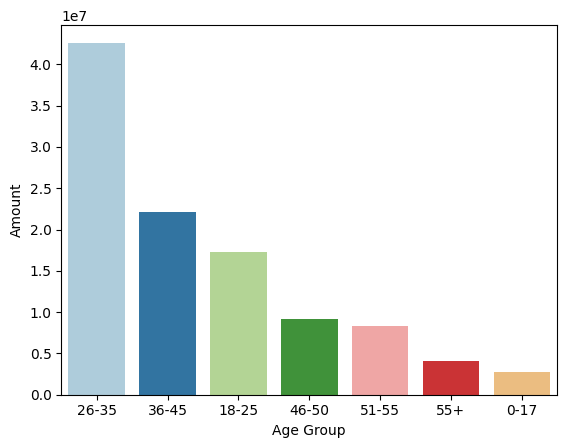

In [30]:
# Barplot with total amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age,palette='Paired')

**From above graphs we can see that most of the buyers are of age group between 26-35 years females.**

# State

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

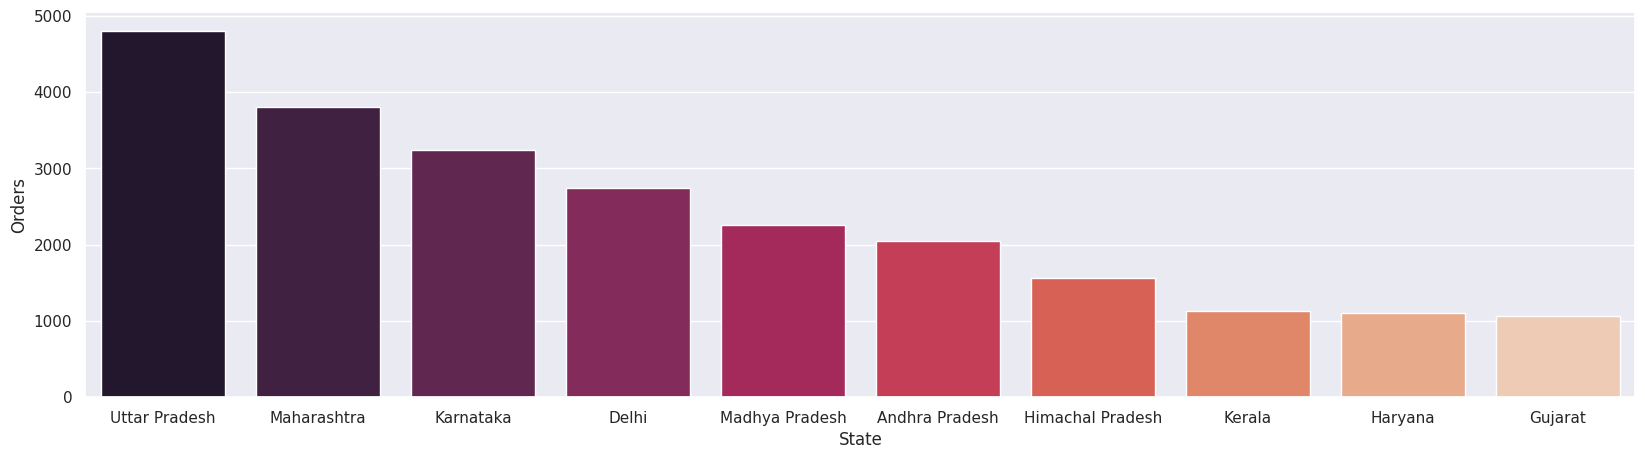

In [34]:
# Barplot with State and Orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders',palette='rocket')

<Axes: xlabel='State', ylabel='Amount'>

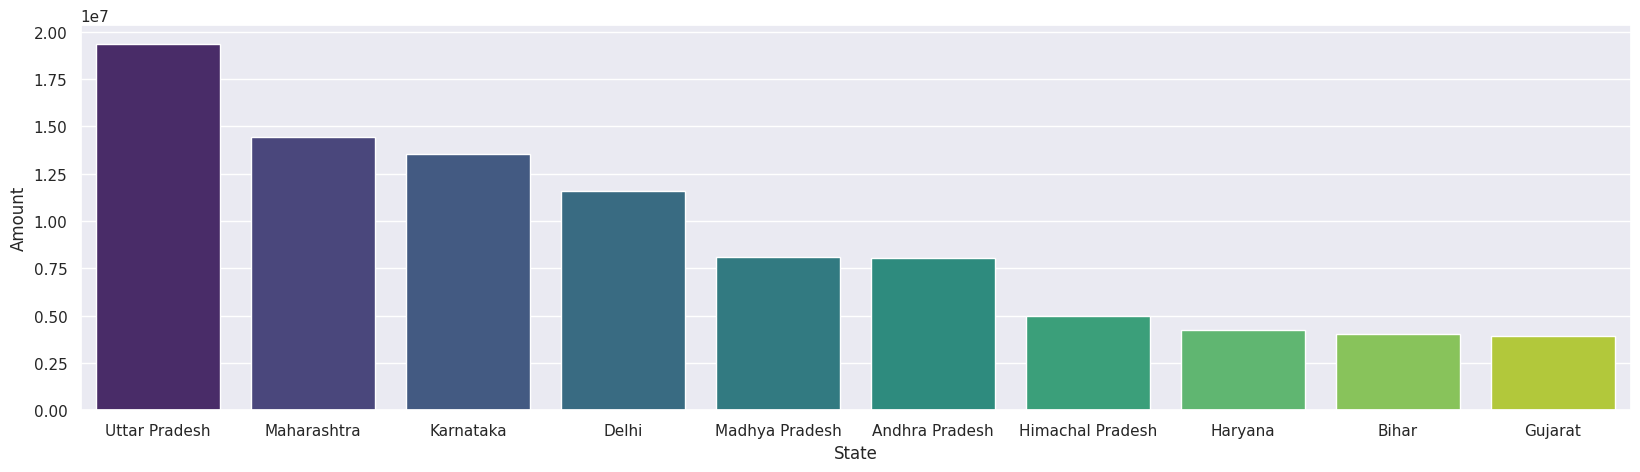

In [38]:
# Total Sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount',palette='viridis')

**From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.**

# Marital Status

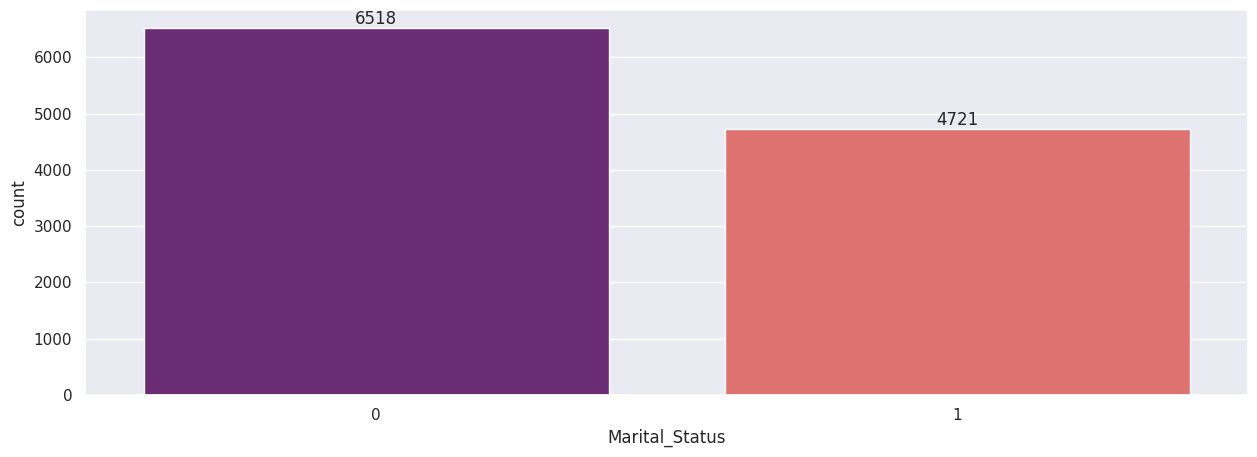

In [76]:
# Countplot for marital status
ax = sns.countplot(x = 'Marital_Status', data = df,palette='magma')

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

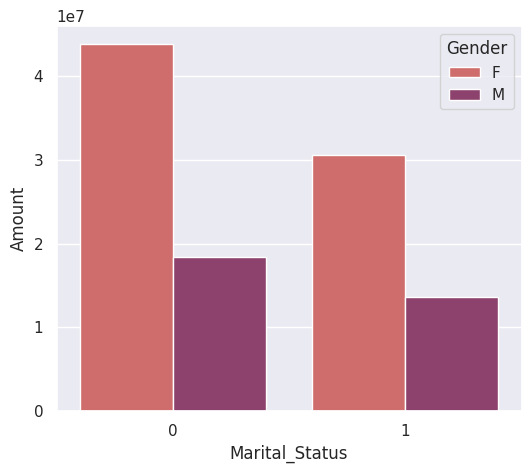

In [44]:
# Groupby Marital staus and Gender and plotting bar
sales_marriage = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_marriage, x = 'Marital_Status', y = 'Amount', hue = 'Gender',palette='flare')

**From the above graphs its clear that most of the buyers are married women and they've higher purchasing power.**

# Occupation

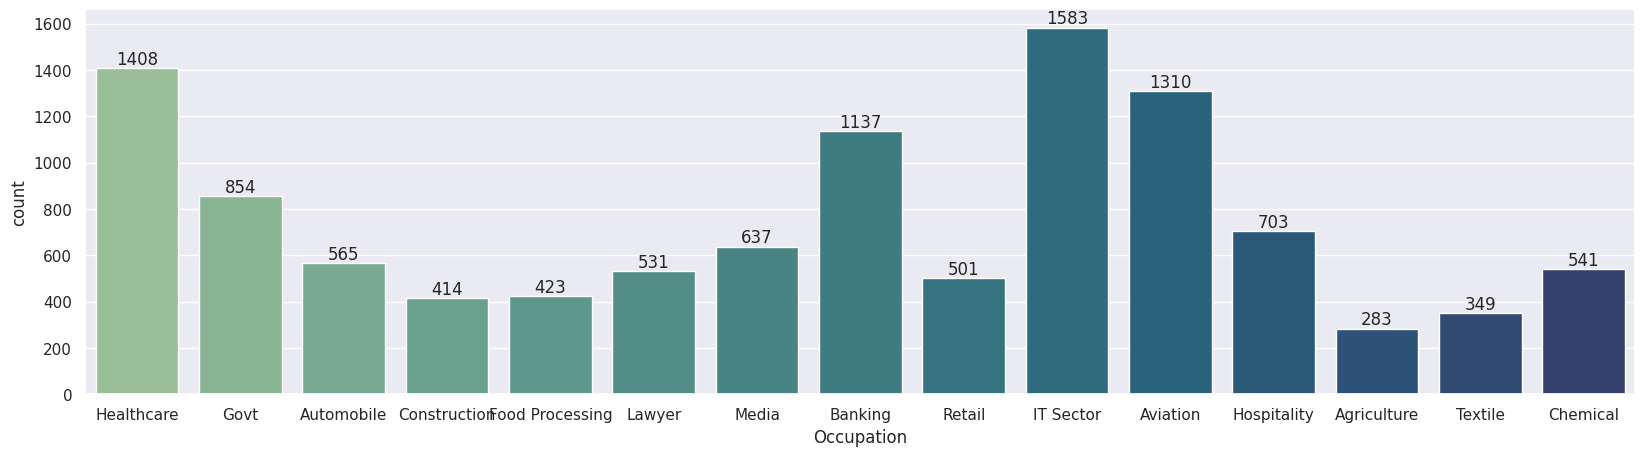

In [46]:
# Countplot for Occupation with labels
sns.set(rc ={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',palette='crest')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

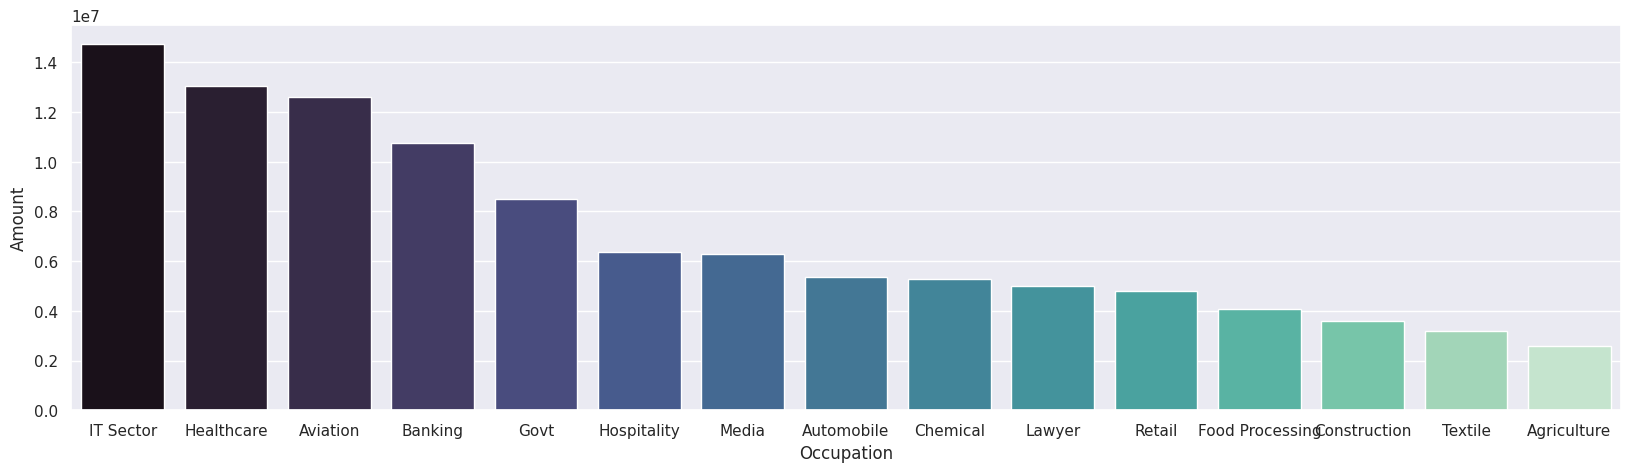

In [47]:
# Groupby occupation
# Barplot with Occupation and amount
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_occupation, x = 'Occupation', y = 'Amount',palette='mako')

**From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

# Product Category

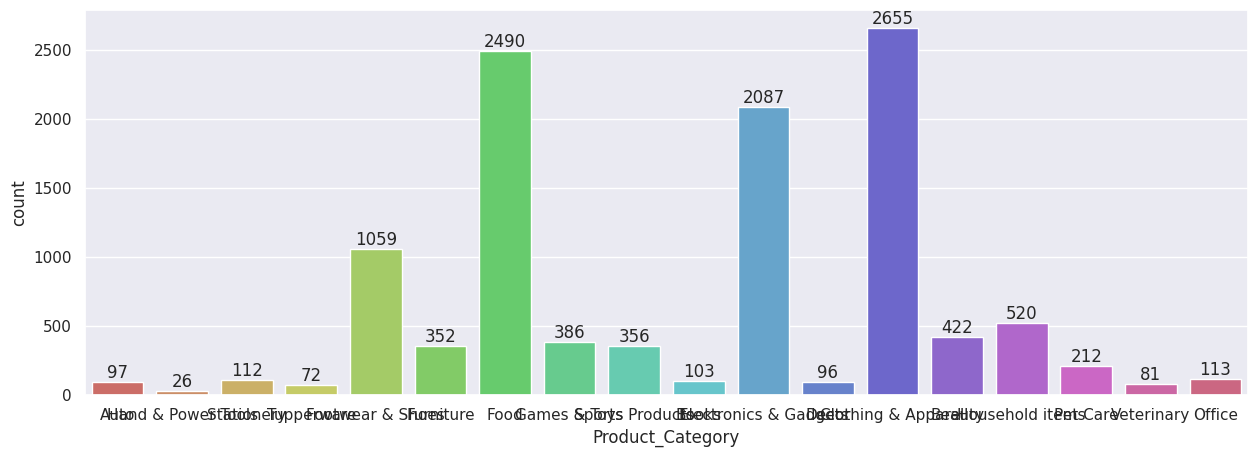

In [69]:
# Countplot for product category with labels
ax = sns.countplot(data = df, x = 'Product_Category',palette='hls')
sns.set(rc = {'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

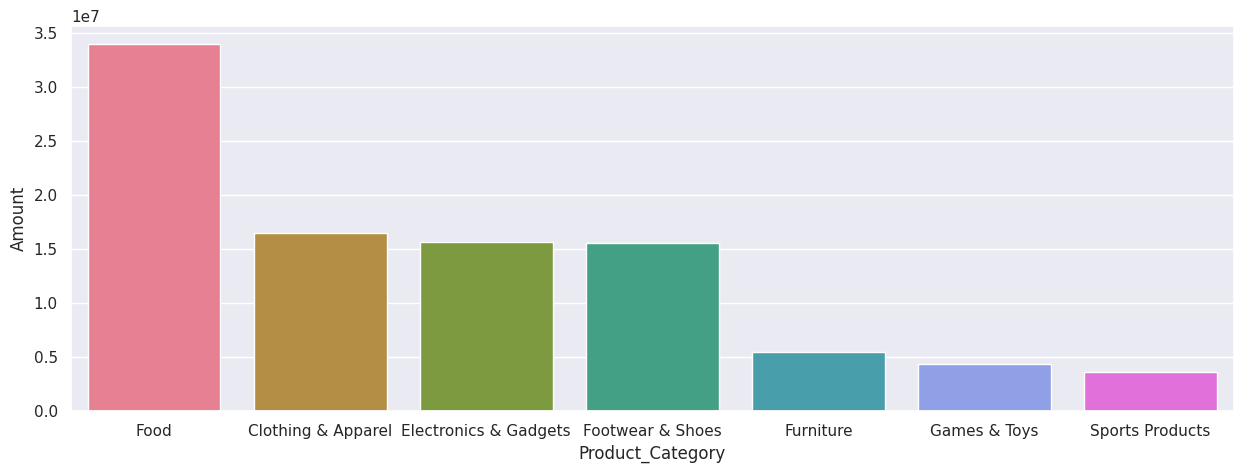

In [72]:
# Groupby product category
# Barplot with product category vs amount
sales_procat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(7)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_procat, x = 'Product_Category', y = 'Amount',palette='husl')

**From the above graphs we can understand most sold out products are in Food, Clothing & Apparel and Electronic & Gadgets category.**

<Axes: xlabel='Product_ID', ylabel='Orders'>

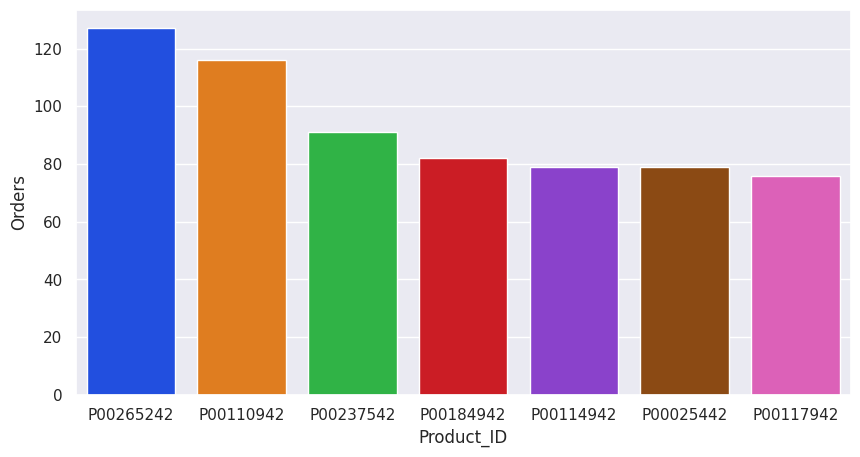

In [60]:
# Groupby product id
# Barplot with product id and orders
sales_topprod = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(7)

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = sales_topprod, x = 'Product_ID', y = 'Orders',palette='bright')

<Axes: xlabel='Product_ID'>

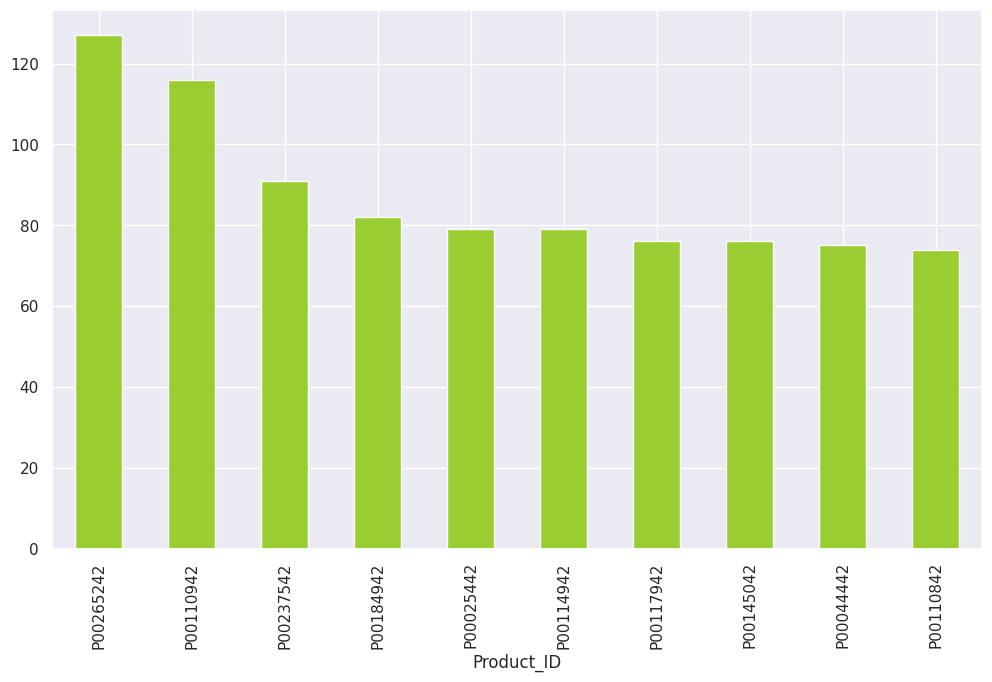

In [57]:
# Top 10 Most Sold Products (Same thing as above)

fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar',color='yellowgreen')

# Conclusion

**Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.**